# This project is about building a Machine  Learning  Model to predict Customer Churn in a Telecommunication Company.


## Objectives
    1. Build a Supervised Classification Model to predict Customer Churn
    2. Identify most important features that account for Customer Churn

In this section we import libraries required. The data is then imported and summary statistics is performed. Visualizations in relation to the target feature 'Churn' is also performed.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Model Packages
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.base import TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

In [3]:
#Feature plot libraries
from yellowbrick.model_selection import FeatureImportances
from xgboost import plot_importance

C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
#importing data
dataset=pd.read_csv('Telco-Customer-Churn.csv')
dataset.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1139,3082-WQRVY,Male,1,Yes,No,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,228.65,No
2574,3269-ATYWD,Male,1,No,No,39,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.65,3759.05,Yes
2099,2190-BCXEC,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,No
4428,5449-FIBXJ,Male,0,Yes,Yes,19,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.30,2012.7,Yes
443,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Electronic check,64.80,1166.7,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Conversion
    

The features MonthlyCharges, TotalCharges and tenure are imported as objects hence we change to integer or float

In [6]:
#Convert some variables into its numerics
dataset["MonthlyCharges"]=pd.to_numeric(dataset["MonthlyCharges"],errors='coerce')
dataset["TotalCharges"]=pd.to_numeric(dataset["TotalCharges"],errors='coerce')
dataset["tenure"]=pd.to_numeric(dataset["tenure"],errors='coerce')

In [7]:
#Convert the target variable to numerics
def churn(self):
    if self == 'Yes':
        return 1
    elif self == 'No':
        return 0

dataset["Churn"]=dataset["Churn"].apply(churn)

In [8]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


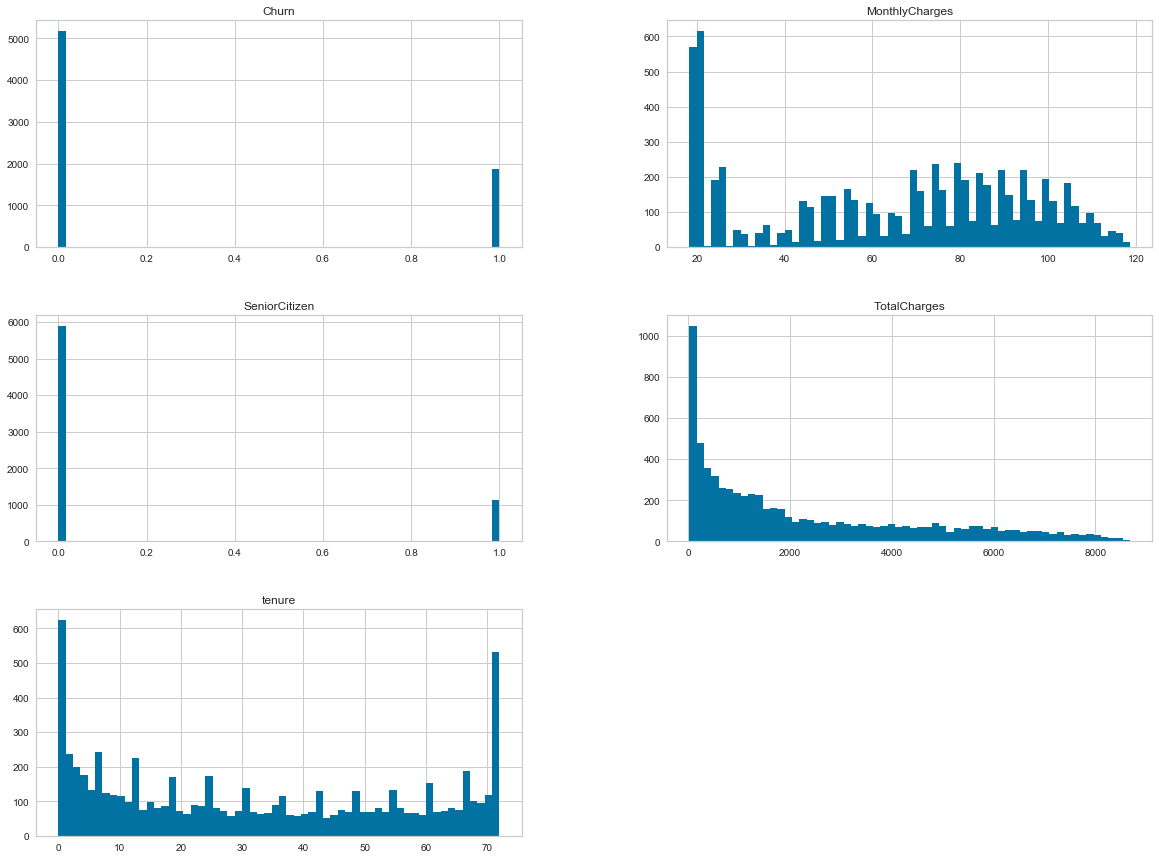

In [9]:
dataset.hist(bins = 60, figsize = (20, 15))
plt.show()

## Exploratory Data Analysis (EDA)

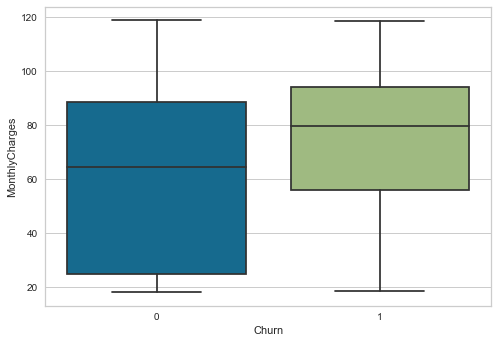

In [10]:
#Boxplot of Churn and MonthlyCharges
sns.boxplot(x="Churn", y="MonthlyCharges", data=dataset)

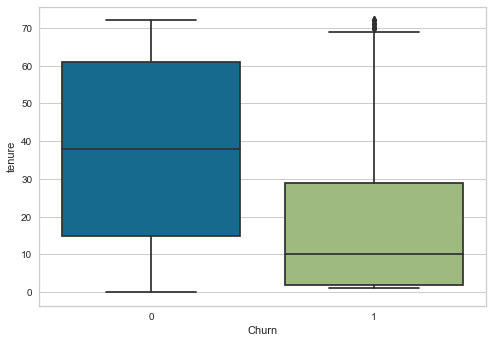

In [11]:
#Boxplot of Churn and tenure
sns.boxplot(x="Churn", y="tenure", data=dataset)

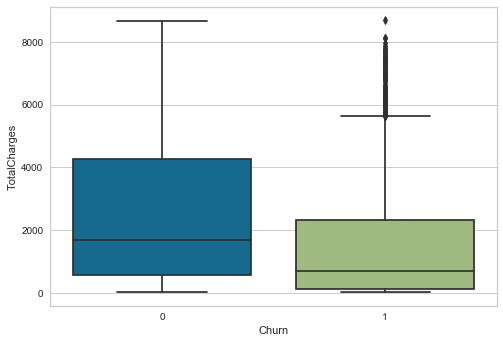

In [12]:
#Boxplot of Churn and TotalCharges
sns.boxplot(x="Churn", y="TotalCharges", data=dataset)

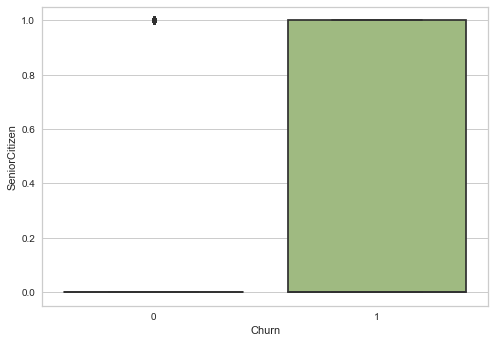

In [13]:
#Boxplot of Churn and SeniorCitizen
sns.boxplot(x="Churn", y="SeniorCitizen", data=dataset)

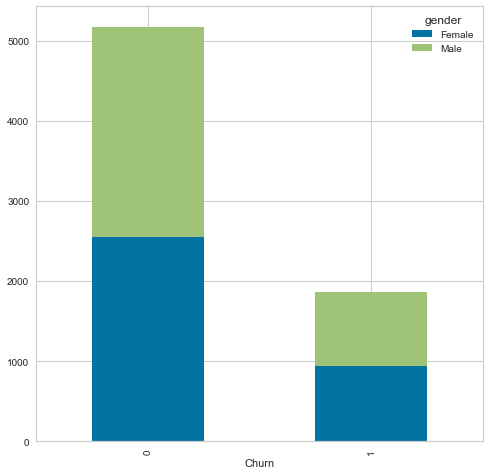

In [14]:
#Stackplot of Churn and gender
clarity_color_table = pd.crosstab(index=dataset["Churn"],columns=dataset["gender"])
clarity_color_table
clarity_color_table.plot(kind="bar", figsize=(8,8),stacked=True)

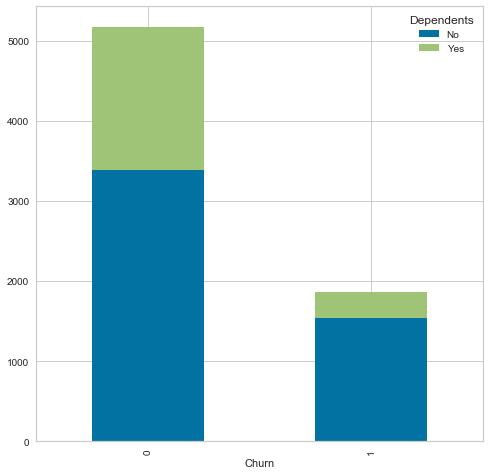

In [15]:
#Stackplot of Churn and Dependents
clarity_color_table = pd.crosstab(index=dataset["Churn"],columns=dataset["Dependents"])
clarity_color_table
clarity_color_table.plot(kind="bar", figsize=(8,8),stacked=True)

### Missing Values 

The variable TotalCharges has missing values and hence we impute by using the median approach for missing numerical variable.

In [16]:
##Checking the number of missing values across dataframe 
Train_missing=dataset.isnull().sum()
#Checking the percentage of missing numbers 
Train_missing=dataset.isna().mean().round(4) * 100
Train_missing

customerID          0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [17]:
#Imputting missing values
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


dataset = DataFrameImputer().fit_transform(dataset)

In [18]:
#Checking the percentage of missing numbers 
Train_missing=dataset.isna().mean().round(4) * 100
Train_missing

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Dropping Sparse variable 

The customer ID variable is deleted because it has so many categories and when used in our model it will cause lot of noise which will obstruct getting model with good prediction.

In [19]:
#Dropping the EmployeeID feature
dataset=dataset.drop('customerID',axis=1)
dataset.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5570,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.15,3532.85,0
657,Male,0,Yes,No,45,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.80,3597.50,0
6501,Female,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,6816.95,0


### Transforming Categorical Variables to Numerical Variables 

In [20]:
#Detecting numerical features from data
num_cols = dataset._get_numeric_data().columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [21]:
#Detecting categorical features in data
categorical_columns=list(set(dataset.columns) - set(num_cols))
categorical_columns

['PhoneService',
 'OnlineSecurity',
 'Partner',
 'TechSupport',
 'MultipleLines',
 'PaymentMethod',
 'Contract',
 'StreamingTV',
 'Dependents',
 'StreamingMovies',
 'InternetService',
 'OnlineBackup',
 'gender',
 'DeviceProtection',
 'PaperlessBilling']

In [22]:
#Encoding categorical features with onehotencoding
dfonehotencoded= pd.get_dummies(dataset, prefix_sep='_',columns=categorical_columns)
dfonehotencoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
SeniorCitizen                              7043 non-null int64
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
Churn                                      7043 non-null int64
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
OnlineSecurity_No                          7043 non-null uint8
OnlineSecurity_No internet service         7043 non-null uint8
OnlineSecurity_Yes                         7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
TechSupport_No                             7043 non-null uint8
TechSupport_No internet service            7043 non-null uint8
TechSup

In [23]:
dfonehotencoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,gender_Female,gender_Male,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,29.85,29.85,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
1,0,34,56.95,1889.50,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,1,0
2,0,2,53.85,108.15,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,0,2,70.70,151.65,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
7039,0,72,103.20,7362.90,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,1
7040,0,11,29.60,346.45,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
7041,1,4,74.40,306.60,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1


### Imbalance target feature 

In [24]:
#Checking Imbalance representation in target feature
dfonehotencoded['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
#Percentage of imbalance data in target feature
print('0 (Churn)', round(dfonehotencoded['Churn'].value_counts()[0]/len(dfonehotencoded) * 100,2), '% of the dataset')
print('1 (Churn)', round(dfonehotencoded['Churn'].value_counts()[1]/len(dfonehotencoded) * 100,2), '% of the dataset')

0 (Churn) 73.46 % of the dataset
1 (Churn) 26.54 % of the dataset


# Correlation Plot 

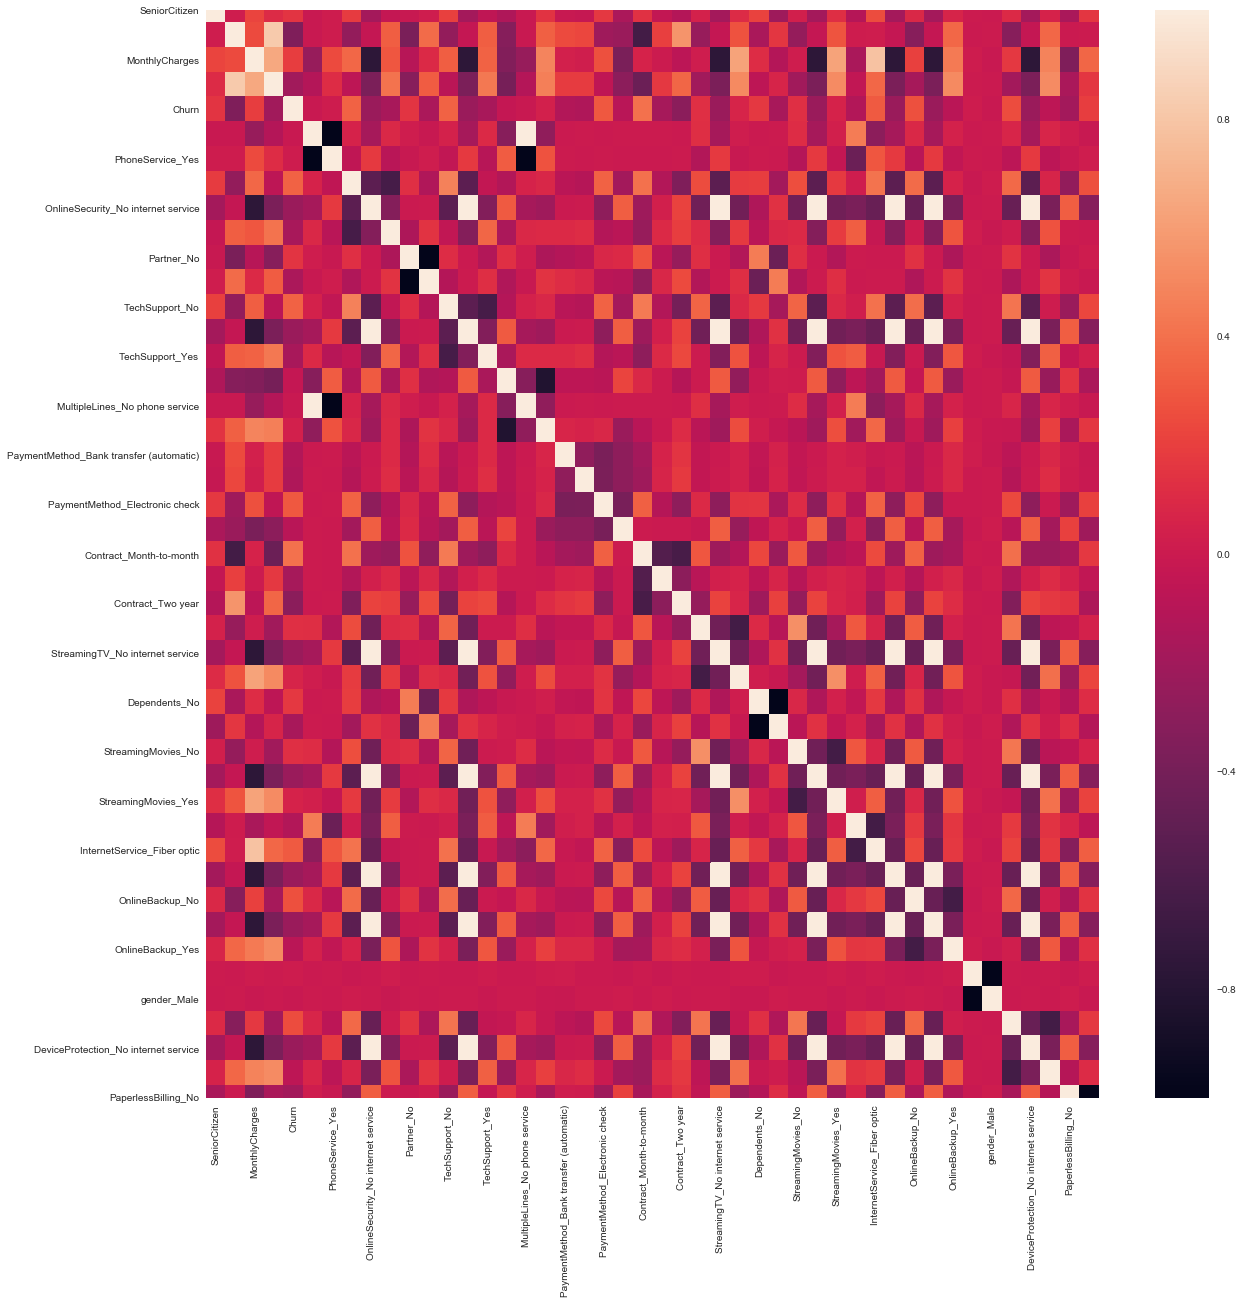

In [26]:
#Visualization of Correlation Plot of Balanced data
sns.heatmap(dfonehotencoded.corr())
fig = plt.gcf()
fig.set_size_inches( 20, 20)

### Splitting data into Train and Test set 

In [27]:
# Separate input features (X) and target variable (y)
from sklearn.model_selection import train_test_split
y = dfonehotencoded.Churn
X = dfonehotencoded.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### ROSE (Smote) to treat imbalance data on target feature

In [28]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [29]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [30]:
print ('ROS Input Data Shape for Smoke Data: {}'.format(X_train.shape))
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_train.shape))

ROS Input Data Shape for Smoke Data: (8276, 45)
ROS Output Data Shape for Smoke Data: (8276,)


### Training and Evaluating Classification Predictive Models

In this section we build four (4) classification models to predict customer churn. We then again evaluate each model to decide on the model with good evaluation F_1 metrics and use as our final model.

#  XGBoost Classifier

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

0.7608232789212207
[[763 273]
 [ 64 309]]
precision =  0.5309278350515464 
 recall =  0.8284182305630027


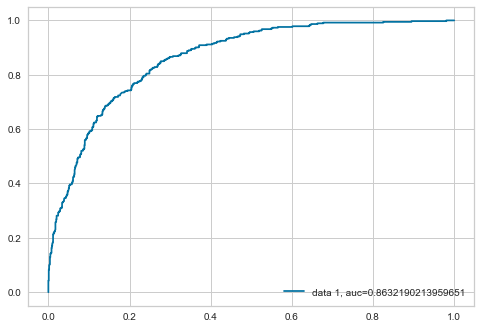

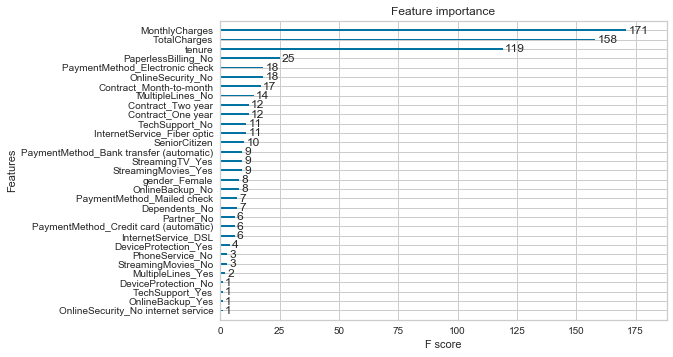

In [31]:
xgb=XGBClassifier()
xgb=xgb.fit(X_train,y_train)

pred = xgb.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plot feature importance
plot_importance(xgb)
plt.show()

# Logistic Regression Classifier

C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

0.7530163236337828
[[750 286]
 [ 62 311]]
precision =  0.5209380234505863 
 recall =  0.8337801608579088


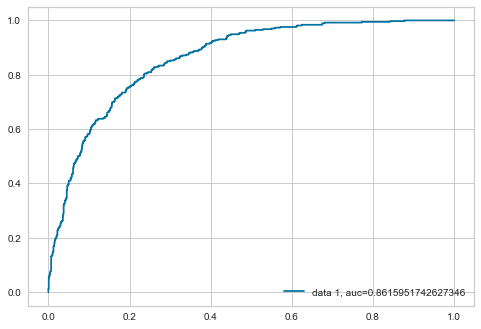

C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


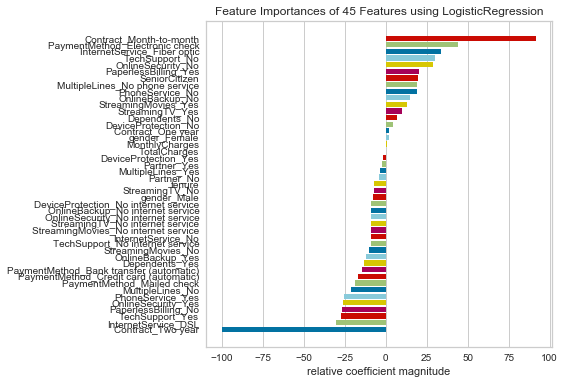

In [32]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

log_reg = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(log_reg)
viz.fit(X_train,y_train)
viz.show()

# Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1036
           1       0.45      0.87      0.60       373

    accuracy                           0.69      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.81      0.69      0.71      1409

0.6891412349183819
[[645 391]
 [ 47 326]]
precision =  0.45467224546722457 
 recall =  0.8739946380697051


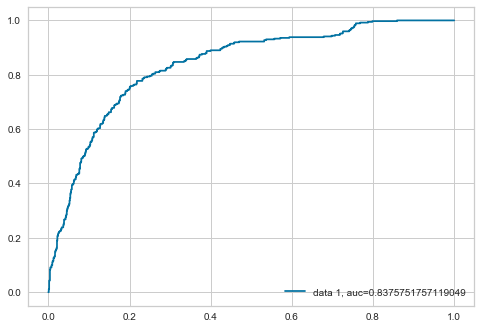

In [33]:
nav_bays = GaussianNB()
nav_bays.fit(X_train,y_train)

pred = nav_bays.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = nav_bays.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#log_reg = LogisticRegression(multi_class="auto", solver="liblinear")
#viz = FeatureImportances(log_reg)
#viz.fit(X_train,y_train)
#viz.show()

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1036
           1       0.51      0.53      0.52       373

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

0.7423704755145494
[[850 186]
 [177 196]]
precision =  0.5130890052356021 
 recall =  0.5254691689008043


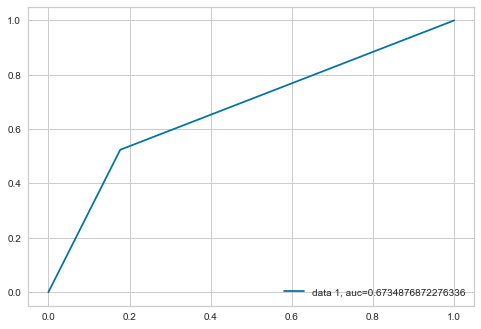

C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


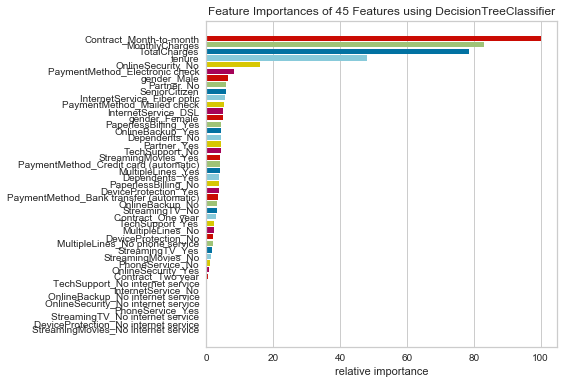

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
#print (impFeatures)

#Feature Selection for Decision Tree
dec_tre = DecisionTreeClassifier()
viz = FeatureImportances(dec_tre)
viz.fit(X_train,y_train)
viz.show()

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.60      0.56      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409

0.7835344215755855
[[894 142]
 [163 210]]
precision =  0.5965909090909091 
 recall =  0.5630026809651475


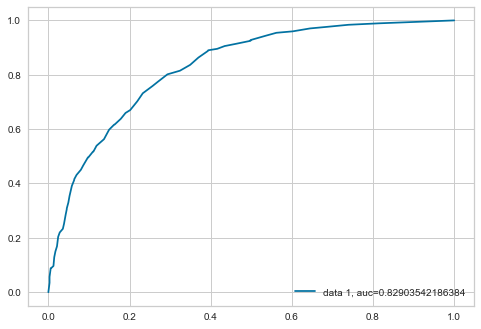

C:\Users\PRINCE\Anaconda3\anaconda4\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


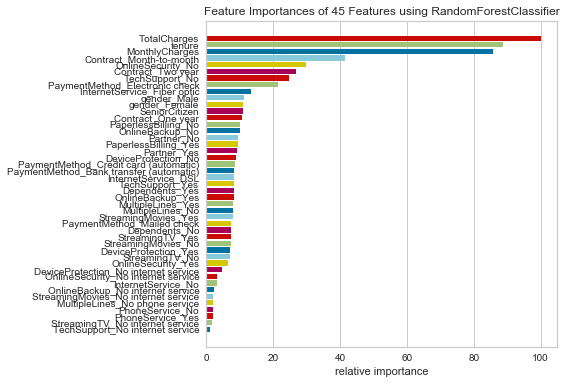

In [35]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train,y_train)

pred = ran.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Feature Selection for Random Forest
ran_for=RandomForestClassifier()
viz = FeatureImportances(ran_for)
viz.fit(X_train,y_train)
viz.show()

# K-Nearest Neighbors Classifier

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1036
           1       0.44      0.73      0.55       373

    accuracy                           0.69      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.76      0.69      0.70      1409

0.6863023420865862
[[694 342]
 [100 273]]
precision =  0.44390243902439025 
 recall =  0.7319034852546917


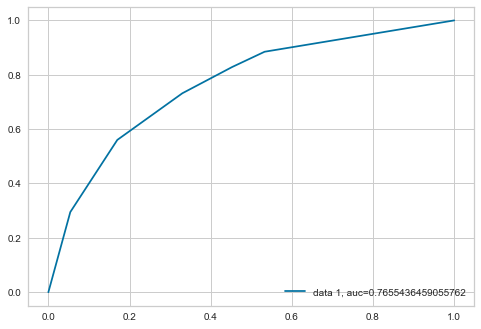

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machine Classifier

In [37]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

0.758694109297374
[[775 261]
 [ 79 294]]
precision =  0.5297297297297298 
 recall =  0.7882037533512064


# Maximum Hard Voting Ensemble Model 

In [38]:
#Maximum Hard Voting Ensemble Model 
voting_clf = VotingClassifier(estimators = [('lr', log_reg), ('dec',dec_tre), ('ran', ran_for), ('nav',nav_bays), ('xgb',xgb)],voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dec',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='g...
                                        

In [39]:
vt_clf = voting_clf.predict(X_test)
pred = voting_clf.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)



              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409

0.7650816181689141
[[776 260]
 [ 71 302]]
precision =  0.5373665480427047 
 recall =  0.8096514745308311


# Conclusion

We have used 7 classifiers including XGBoost, Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K nearest 
neighbours and Support Vector Machines. The maximum hard vote ensemble model performs better.